In [3]:
import pandas as pd

# Load microplastics dataset
df_micro = pd.read_excel(r"D:\workshop 2025\project\datasets\DS4\Marine_Microplastics.xlsx")

# Show first 5 rows
print(df_micro.head())

# Show column names
print("\nColumns in dataset:\n", df_micro.columns)


   OBJECTID          Oceans Regions SubRegions  Sampling Method  Measurement  \
0      9676  Atlantic Ocean     NaN        NaN      Grab sample        0.018   
1      6427   Pacific Ocean     NaN        NaN      Neuston net        0.000   
2     10672   Pacific Ocean     NaN        NaN        Manta net        0.013   
3     13921  Atlantic Ocean     NaN        NaN  Aluminum bucket     1368.000   
4      9344   Pacific Ocean     NaN        NaN      Grab sample        0.001   

        Unit Density Range Density Class       Short Reference  ...  \
0  pieces/m3       0.005-1        Medium    Barrows et al.2018  ...   
1  pieces/m3      0-0.0005      Very Low        Law et al.2014  ...   
2  pieces/m3       0.005-1        Medium  Goldstein et al.2013  ...   
3  pieces/m3          >=10     Very High    Queiroz et al.2022  ...   
4  pieces/m3  0.0005-0.005           Low    Barrows et al.2018  ...   

                                        Organization  \
0                                Adv

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Select features + target
features = ["Measurement", "Oceans", "Sampling Method", "Latitude", "Longitude"]
target = "Density Class"

df = df_micro[features + [target]].dropna()


In [5]:
# Encode categorical columns
label_encoders = {}
for col in ["Oceans", "Sampling Method"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

# Encode target
le_target = LabelEncoder()
df[target] = le_target.fit_transform(df[target])


In [6]:
# Split data
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [7]:
# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le_target.classes_))

Confusion Matrix:
 [[ 215    0    0    0    0]
 [   0  390    2    0    0]
 [   0    1 1289    0    0]
 [   0    0    0   82    0]
 [   0    0    0    0  944]]

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       215
         Low       1.00      0.99      1.00       392
      Medium       1.00      1.00      1.00      1290
   Very High       1.00      1.00      1.00        82
    Very Low       1.00      1.00      1.00       944

    accuracy                           1.00      2923
   macro avg       1.00      1.00      1.00      2923
weighted avg       1.00      1.00      1.00      2923



In [8]:
# ===================================
# Train & Save Microplastics Model
# ===================================

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Features & Target
X = df.drop(columns=["Density Class"])  # drop target
y = df["Density Class"]

# Convert categorical features
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Save model
joblib.dump(model, "microplastics_model.pkl")
print("✅ Microplastics model saved as 'microplastics_model.pkl'")


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      0.99      1.00       392
           2       1.00      1.00      1.00      1290
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00       944

    accuracy                           1.00      2923
   macro avg       1.00      1.00      1.00      2923
weighted avg       1.00      1.00      1.00      2923


Confusion Matrix:
 [[ 215    0    0    0    0]
 [   0  390    2    0    0]
 [   0    1 1289    0    0]
 [   0    0    0   82    0]
 [   0    0    0    0  944]]
✅ Microplastics model saved as 'microplastics_model.pkl'


Accuracy: 0.9989736572015053

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      0.99      1.00       392
           2       1.00      1.00      1.00      1290
           3       1.00      1.00      1.00        82
           4       1.00      1.00      1.00       944

    accuracy                           1.00      2923
   macro avg       1.00      1.00      1.00      2923
weighted avg       1.00      1.00      1.00      2923



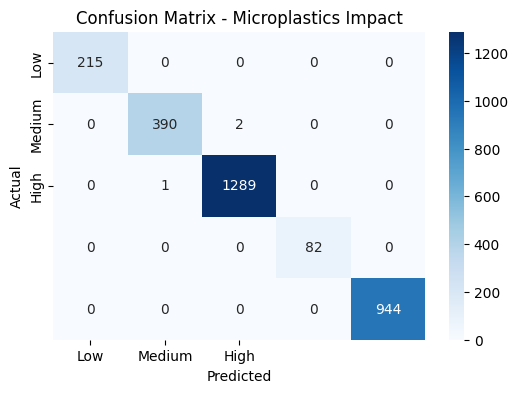

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Microplastics Impact')
plt.show()


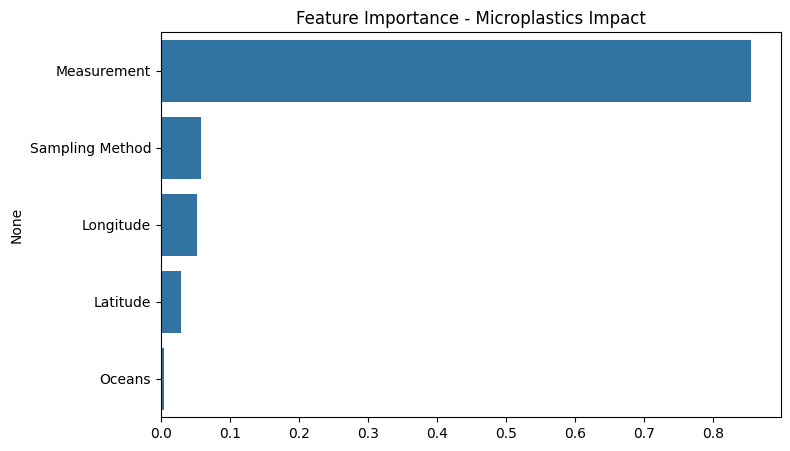

In [10]:
import numpy as np

# Feature importance
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title("Feature Importance - Microplastics Impact")
plt.show()


In [11]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV Score:", scores.mean())


Cross-validation scores: [0.99897366 0.99965789 0.99794731 0.99897331 0.99897331]
Mean CV Score: 0.9989050938496004
